<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the data sets
from google.colab import files
uploaded = files.upload()
import io


Saving dementia_dataset.csv to dementia_dataset.csv


In [3]:
data_df = pd.read_csv(io.BytesIO(uploaded['dementia_dataset.csv']))
data_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
list(data_df.columns)

['Subject ID',
 'MRI ID',
 'Group',
 'Visit',
 'MR Delay',
 'M/F',
 'Hand',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'CDR',
 'eTIV',
 'nWBV',
 'ASF']

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
data_df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
#checking the missing data
data_df.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [8]:
#checking for the number of missing data per column
data_df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [9]:
#checking for the number of missing values
data_df.isnull().sum().sum()

21

In [10]:
#checking for the row per column before data cleaning 
data_df.shape

(373, 15)

In [11]:
#data cleaning
df_drop = data_df.dropna()

In [12]:
#  checking the row per column after data cleaning
df_drop.shape

(354, 15)

In [13]:
# inspecting the cleaning data
df_drop.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

array([[<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'MR Delay'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EDUC'}>,
        <Axes: title={'center': 'SES'}>,
        <Axes: title={'center': 'MMSE'}>],
       [<Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>,
        <Axes: title={'center': 'nWBV'}>],
       [<Axes: title={'center': 'ASF'}>, <Axes: >, <Axes: >]],
      dtype=object)

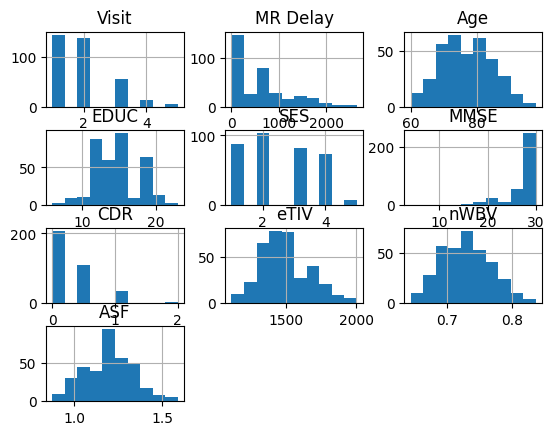

In [14]:
# general visualization using all the column
df_drop.hist()

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

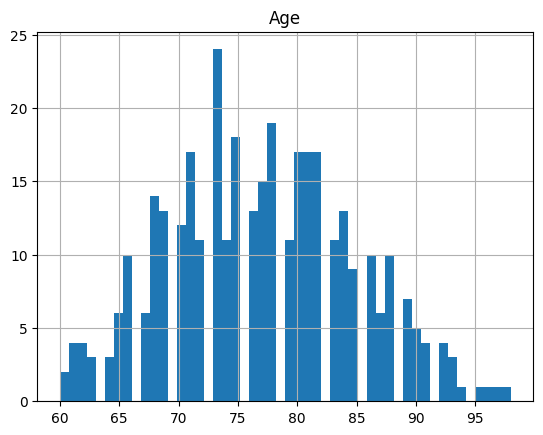

In [15]:
df_drop.hist(column='Age' , bins=50) 

<ipython-input-16-89681904e0d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drop.Age , kde=True)


<Axes: xlabel='Age', ylabel='Density'>

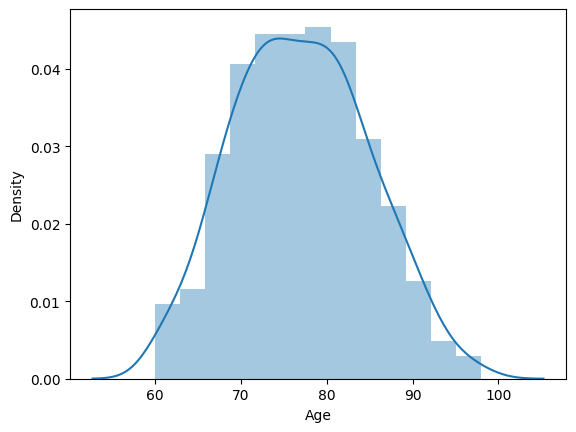

In [16]:
sns.distplot(df_drop.Age , kde=True)

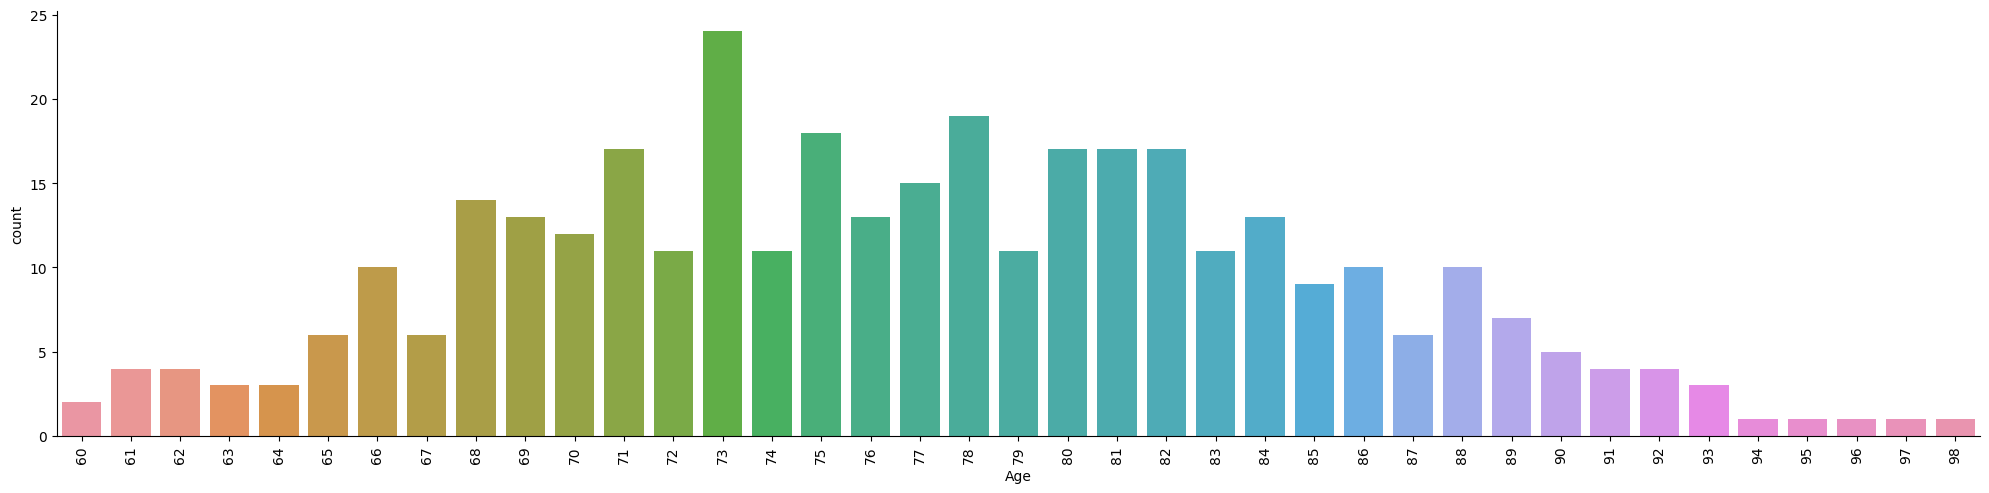

In [17]:
ax = sns.catplot(data = df_drop, x="Age", kind="count", aspect = 4);

plt.xticks(rotation=90);

<Axes: >

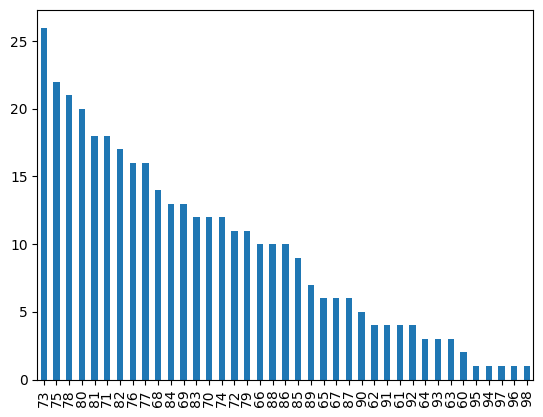

In [21]:
data_df['Age'].value_counts().plot(kind='bar')


<Axes: >

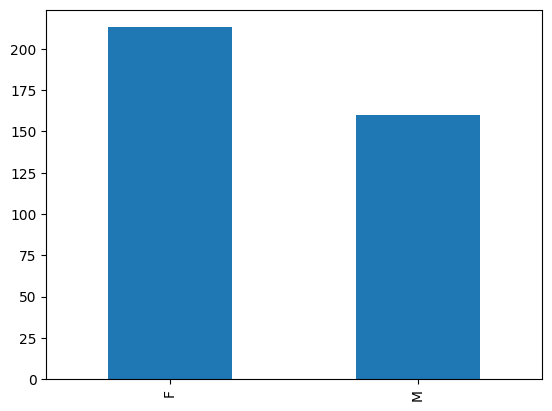

In [22]:
data_df['M/F'].value_counts().plot(kind='bar')

In [25]:
import itertools

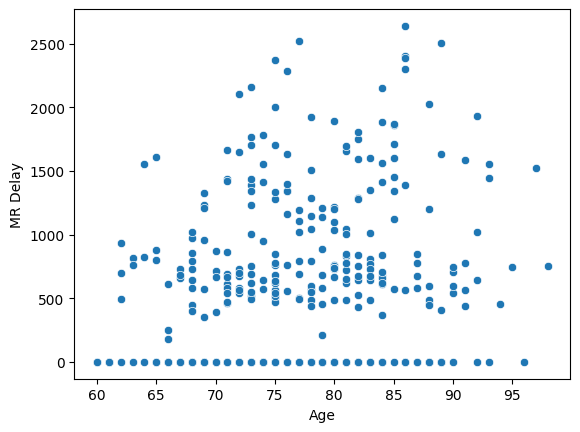

In [29]:
from pandas.io.pytables import Any

ax = sns.scatterplot(x="Age", y="MR Delay", data=data_df)